In [1]:
import pandas as pd
import numpy as np

###`Q-1:` Write a program to create an empty series.

In [4]:
a = np.nan*(np.arange(5))

s = pd.Series(a)
s

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [10]:
s = pd.Series([1,2,3,4,5])
k = pd.Series([3,5,5,2,9])

print(s+k)
print(s*k)
print(s/k)
print(s-k)

0     4
1     7
2     8
3     6
4    14
dtype: int64
0     3
1    10
2    15
3     8
4    45
dtype: int64
0    0.333333
1    0.400000
2    0.600000
3    2.000000
4    0.555556
dtype: float64
0   -2
1   -3
2   -2
3    2
4   -4
dtype: int64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [13]:
s1 = pd.Series([2,4,6,8,10])
s2 = pd.Series([1,3,5,7,10])

print(s1>s2)
print(s1==s2)
print(s1<s2)

0     True
1     True
2     True
3     True
4    False
dtype: bool
0    False
1    False
2    False
3    False
4     True
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [14]:
def change_to_numeric(series):
    return pd.to_numeric(series,errors='coerce') # throw nan value when series data is in string datatype

series = pd.Series([1,2,'Python', 2.0, True, 100])
change_to_numeric(series)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [35]:
series = pd.read_csv('C:\Git hub\Data-Science\Pandas\Datasets\player_runs.csv', index_col ="batter").squeeze()
series

batter
A Ashish Reddy     280
A Badoni           161
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yash Dayal           0
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2754
Z Khan             117
Name: batsman_run, Length: 605, dtype: int64

In [36]:
# top 10 scorer
series.sort_values(ascending=False).head(10)

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64

###`Q-7` No of players having runs above 3000

In [41]:
series[series>3000].size

20

###`Q-8` No of players having runs above mean value?

In [42]:
series[series>series.mean()].size

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`

    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [85]:
# 1

items = pd.read_csv('C:\Git hub\Data-Science\Pandas\Datasets\items.csv', index_col= "item_name").squeeze()
items

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [86]:
# 2 No of nan values
items.isna().sum()

50

In [88]:
# 3

def rupees(x):
    try:
        y=x[1:]
    except:
        y=x

    return float(y)*82.93


items = items.apply(rupees)

In [90]:
#4

items.fillna(items.mean())


item_name
Chips and Fresh Tomato Salsa              198.2027
Izze                                      281.1327
Nantucket Nectar                          281.1327
Chips and Tomatillo-Green Chili Salsa     198.2027
Chicken Bowl                             1408.1514
                                           ...    
Steak Burrito                             974.4275
Steak Burrito                             974.4275
Chicken Salad Bowl                        932.9625
Chicken Salad Bowl                        725.6375
Chicken Salad Bowl                        725.6375
Name: item_price, Length: 4622, dtype: float64

###`Q-10`:

    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [92]:
items.mean()

618.9092019685039

In [102]:
# ii

print(items.quantile(q=0.3))
print(items.quantile(q=0.06))

369.03850000000006
103.66250000000001


<Axes: ylabel='Frequency'>

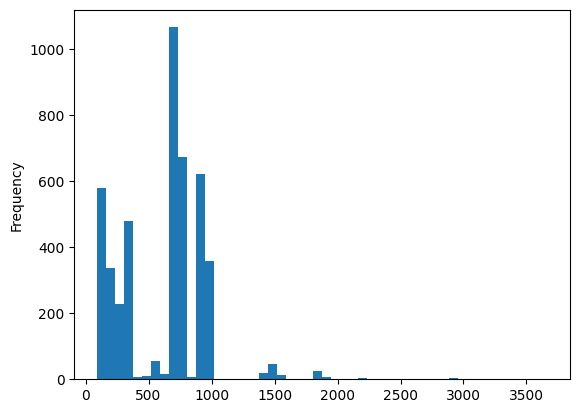

In [95]:
# iii

items.plot.hist(bins = 50)

In [99]:
# iv

items[(items>=1000) & (items <2000)].size

116